In [5]:
import pandas as pd
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib import cm

import ast

In [6]:
def read_data(state, city):
    data = pd.read_csv(f"data\\Rest_{state}_{city}.csv", index_col=0).reset_index(drop=True)
    data = data[["latitude", "longitude", "stars", "is_open", "attributes", "categories", "review_count"]]
    attrs = ["RestaurantsTableService", "WiFi", "RestaurantsReservations", "WheelchairAccessible", "RestaurantsPriceRange2", "Ambience", 
                  "HasTV", "Alcohol", "RestaurantsTakeOut", "NoiseLevel", "RestaurantsAttire", "RestaurantsDelivery", "GoodForKids", "Music", "CoatCheck"]
    ambiance = ['romantic', 'intimate', 'classy', 'hipster', 'divey', 'touristy', 'trendy', 'upscale', 'casual']
    music = ['dj', 'background_music', 'no_music', 'jukebox', 'live', 'video', 'karaoke']
    
    useful_attr={}
    for attr in attrs:
        useful_attr[attr]=[]
    useful_ambiance = {}
    for a in ambiance:
        useful_ambiance[a]=[]
    useful_music = {}
    for m in music:
        useful_music[m]=[]
    
    for i, row in data.iterrows():
        try:
            attr_dict = ast.literal_eval(row["attributes"].replace("u'", "'"))
        except:
            attr_dict={}
        for key in useful_attr:
            if key in attr_dict and attr_dict[key].lower()!="none":
                useful_attr[key].append(attr_dict[key])
            else:
                useful_attr[key].append(None)
    data = data.join(pd.DataFrame(useful_attr, index=data.index)).fillna(value=np.nan)
    
    for i, row in data.iterrows():
        try:
            am = ast.literal_eval(row["Ambience"])
        except:
            am = {}
        for key in useful_ambiance:
            if key in am:
                useful_ambiance[key].append(am[key])
            else:
                useful_ambiance[key].append(None)
        
        try:
            mu = ast.literal_eval(row["Music"])
        except:
            mu = {}
        for key in useful_music:
            if key in mu:
                useful_music[key].append(mu[key])
            else:
                useful_music[key].append(None)

    data = data.join(pd.DataFrame(useful_ambiance, index=data.index)).join(pd.DataFrame(useful_music, index=data.index)).fillna(value=np.nan)
    del data["attributes"], data["Ambience"], data["Music"]
    return data

In [68]:
bos = read_data(state="MA", city="Boston")
bos

,latitude,longitude,stars,is_open,categories,review_count,RestaurantsTableService,WiFi,RestaurantsReservations,WheelchairAccessible,...,trendy,upscale,casual,dj,background_music,no_music,jukebox,live,video,karaoke
0,42.338544,-71.106842,2.5,1,"Restaurants, Shopping, Shopping Centers",24,NaN,'free',False,NaN,...,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,42.363442,-71.025781,3.5,1,"Sandwiches, Food, Restaurants, Breakfast & Bru...",856,True,'free',False,True,...,False,False,True,False,False,False,False,False,False,False
2,42.342673,-71.084239,4.5,0,"Creperies, Restaurants, Food, Coffee & Tea, Br...",7,False,NaN,False,True,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,42.341876,-71.055116,3.5,1,"American (New), Nightlife, Breakfast & Brunch,...",436,True,'no',True,NaN,...,False,False,True,False,False,False,False,False,False,False
4,42.343415,-71.099013,4.0,1,"Halal, Persian/Iranian, Restaurants, Middle Ea...",158,False,'no',True,True,...,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,42.349461,-71.103862,2.5,0,"Food, Restaurants, Mexican, Tex-Mex",25,NaN,'no',False,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2841,42.355088,-71.062150,4.0,1,"Restaurants, Food, Bars, Venues & Event Spaces...",216,True,'free',True,True,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2842,42.360852,-71.065910,4.5,0,"Pizza, Restaurants",87,NaN,'no',False,NaN,...,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2843,42.335893,-71.074065,3.5,0,"Pizza, Delis, Restaurants",8,NaN,'no',False,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
port = read_data(state="OR", city="Portland")

In [70]:
orlando = read_data(state="FL", city="Orlando")

In [71]:
atlanta = read_data(state="GA", city="Atlanta")

In [72]:
vanc = read_data(state="BC", city="Vancouver")

In [8]:
def BOOL(x):
    if pd.isna(x):
        return x
    return x=="True"


In [9]:
def BOOL_Clean(data):
    for col in ["RestaurantsTableService", "RestaurantsReservations", "WheelchairAccessible", "HasTV", "RestaurantsTakeOut", "RestaurantsDelivery", "GoodForKids", "CoatCheck"]:
        data[col]=data[col].apply(BOOL)
    return data

In [10]:
def clean_data(df):
    def one_h(k, default, func = lambda x: x.replace("'", "")):
        s = df[k].fillna(default).apply(func)
        L = s.unique()
        temp = {}
        for x in L:
            temp[x]=[]
        for i, x in s.iteritems():
            for y in L:
                if x==y:
                    temp[y].append(1)
                else:
                    temp[y].append(0)
        for key in L:
            temp[k + "_" + key]=temp.pop(key)

        return temp
    
    
    result = df.copy()
    #RestaurantsTableService
    result["RestaurantsTableService"] = result["RestaurantsTableService"].fillna(False)
    result["RestaurantsTableService"] = result["RestaurantsTableService"].astype(int)
    
    #WiFi
    result = result.join(pd.DataFrame(one_h("WiFi", "'no'")))
    del result["WiFi"]
    
    #RestaurantsPriceRange2
    result["RestaurantsPriceRange2"] = result["RestaurantsPriceRange2"].fillna("2").astype(int)

    #Alcohol
    result = result.join(pd.DataFrame(one_h("Alcohol", "'none'")))
    del result["Alcohol"]
    
    #NoiseLevel
    result = result.join(pd.DataFrame(one_h("NoiseLevel", "'average'")))
    del result["NoiseLevel"]
    
    #RestaurantsAttire
    result = result.join(pd.DataFrame(one_h("RestaurantsAttire", "'casual'")))
    del result["RestaurantsAttire"]
    
    #review_count
    result["review_count"] = result["review_count"].astype(int)
    
    result["categories"] = result["categories"].str.split(", ")
    
    #All other booleans
    temp = ["RestaurantsReservations", "WheelchairAccessible", "HasTV", "RestaurantsTakeOut",
            "RestaurantsDelivery", "GoodForKids", "CoatCheck", "romantic", "intimate", "classy", 
            "hipster", "divey", "touristy", "trendy", "upscale", "casual", "dj", "background_music",
            "no_music", "jukebox", "live", "video", "karaoke"]
    result[temp] = result[temp].fillna(False)
    result[temp] = result[temp].astype(int)
    
    
    
    return result

In [13]:
bos

,latitude,longitude,stars,is_open,categories,review_count,RestaurantsTableService,WiFi,RestaurantsReservations,WheelchairAccessible,...,trendy,upscale,casual,dj,background_music,no_music,jukebox,live,video,karaoke
0,42.338544,-71.106842,2.5,1,"Restaurants, Shopping, Shopping Centers",24,NaN,'free',False,NaN,...,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,42.363442,-71.025781,3.5,1,"Sandwiches, Food, Restaurants, Breakfast & Bru...",856,True,'free',False,True,...,False,False,True,False,False,False,False,False,False,False
2,42.342673,-71.084239,4.5,0,"Creperies, Restaurants, Food, Coffee & Tea, Br...",7,False,NaN,False,True,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,42.341876,-71.055116,3.5,1,"American (New), Nightlife, Breakfast & Brunch,...",436,True,'no',True,NaN,...,False,False,True,False,False,False,False,False,False,False
4,42.343415,-71.099013,4.0,1,"Halal, Persian/Iranian, Restaurants, Middle Ea...",158,False,'no',True,True,...,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,42.349461,-71.103862,2.5,0,"Food, Restaurants, Mexican, Tex-Mex",25,NaN,'no',False,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2841,42.355088,-71.062150,4.0,1,"Restaurants, Food, Bars, Venues & Event Spaces...",216,True,'free',True,True,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2842,42.360852,-71.065910,4.5,0,"Pizza, Restaurants",87,NaN,'no',False,NaN,...,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2843,42.335893,-71.074065,3.5,0,"Pizza, Delis, Restaurants",8,NaN,'no',False,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
bos = BOOL_Clean(bos)

In [73]:
vanc = clean_data(BOOL_Clean(vanc))

In [74]:
orlando = clean_data(BOOL_Clean(orlando))

In [75]:
atlanta = clean_data(BOOL_Clean(atlanta))

In [90]:
port = clean_data(BOOL_Clean(port))

In [15]:
cleaned_bos = clean_data(bos)

In [16]:
cleaned_bos

,latitude,longitude,stars,is_open,categories,review_count,RestaurantsTableService,RestaurantsReservations,WheelchairAccessible,RestaurantsPriceRange2,...,Alcohol_full_bar,Alcohol_none,Alcohol_beer_and_wine,NoiseLevel_average,NoiseLevel_quiet,NoiseLevel_loud,NoiseLevel_very_loud,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal
0,42.338544,-71.106842,2.5,1,"[Restaurants, Shopping, Shopping Centers]",24,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,42.363442,-71.025781,3.5,1,"[Sandwiches, Food, Restaurants, Breakfast & Br...",856,1,0,1,2,...,1,0,0,1,0,0,0,1,0,0
2,42.342673,-71.084239,4.5,0,"[Creperies, Restaurants, Food, Coffee & Tea, B...",7,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
3,42.341876,-71.055116,3.5,1,"[American (New), Nightlife, Breakfast & Brunch...",436,1,1,0,2,...,1,0,0,1,0,0,0,1,0,0
4,42.343415,-71.099013,4.0,1,"[Halal, Persian/Iranian, Restaurants, Middle E...",158,0,1,1,2,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,42.349461,-71.103862,2.5,0,"[Food, Restaurants, Mexican, Tex-Mex]",25,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2841,42.355088,-71.062150,4.0,1,"[Restaurants, Food, Bars, Venues & Event Space...",216,1,1,1,2,...,0,0,1,1,0,0,0,1,0,0
2842,42.360852,-71.065910,4.5,0,"[Pizza, Restaurants]",87,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2843,42.335893,-71.074065,3.5,0,"[Pizza, Delis, Restaurants]",8,0,0,0,2,...,0,1,0,0,1,0,0,1,0,0


In [29]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import MinMaxScaler

def clustering(data):
    attrs = data.copy()
    del attrs["latitude"], attrs["longitude"]
    del attrs["categories"]
    del attrs["is_open"], attrs["review_count"]

    model = DBSCAN(eps = 1, min_samples =10).fit(attrs)

    ans = data.copy()
    
    ans["cluster1"]=model.labels_+1
    return ans

In [59]:
def elbow(data):
    ans = data.copy()
    temp = np.empty(len(ans))
    for i, clus in ans.copy().groupby("cluster1"):    
        X = clus[["latitude", "longitude"]]
        L = []
        for n in range(1, 21):
            if n<=len(X):
                model = KMeans(n_clusters = n).fit(X)
                L.append(model.score(X))
        print(i)
        plt.plot(L)
        plt.show()
    

In [60]:
def clustering2(data, L):
    ans = data.copy()
    temp = np.empty(len(ans))
    for i, clus in ans.copy().groupby("cluster1"):    
        X = clus[["latitude", "longitude"]]
        if L[i]==0:
            labels = np.array([0]*len(clus))
        else:
            model = KMeans(n_clusters = L[i]).fit(X)
            labels = model.labels_

        temp[X.index] = labels
    ans["cluster2"] = temp
    ans["cluster2"] = ans["cluster2"].astype(int) 

    return ans

0


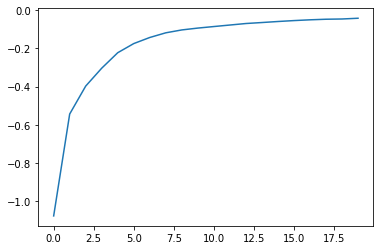

1


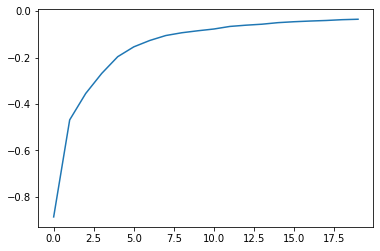

2


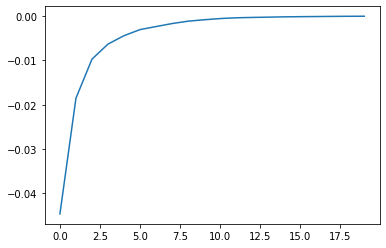

3


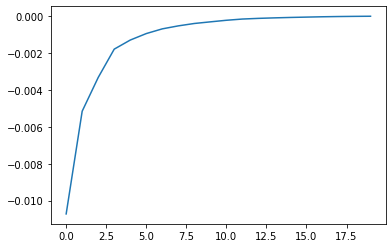

4


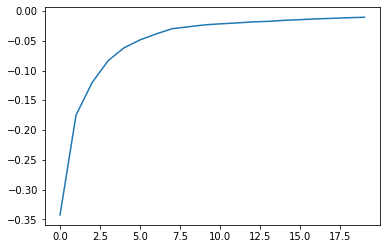

5


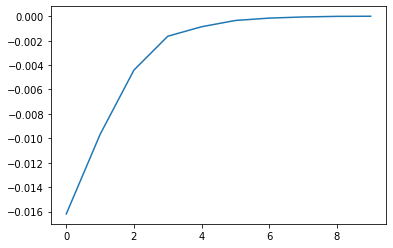

6


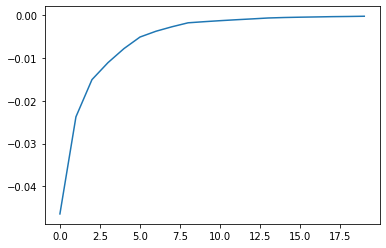

7


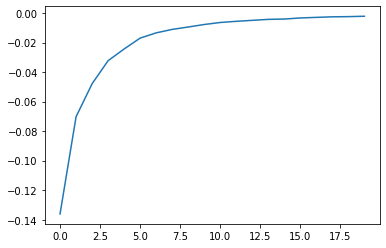

8


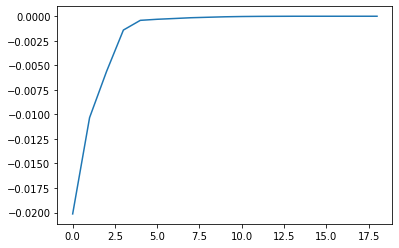

9


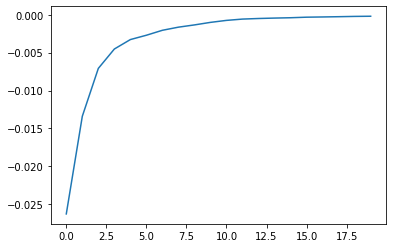

10


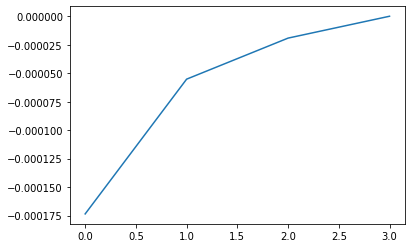

11


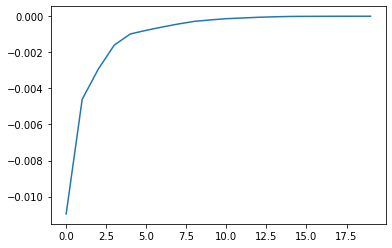

12


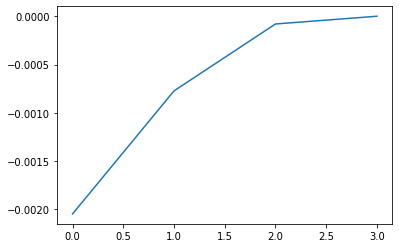

13


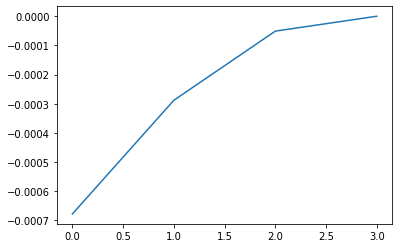

14


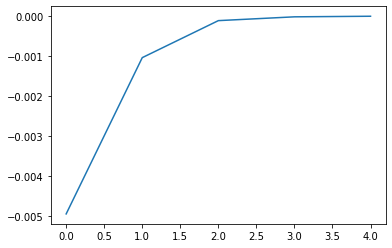

15


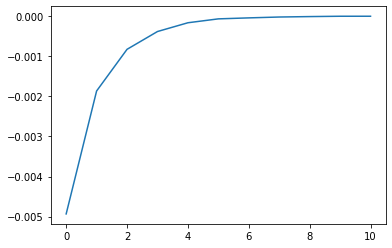

In [61]:
elbow(clustering(cleaned_bos))

In [67]:
clustered_bos = clustering2(clustering(cleaned_bos), [5, 5, 2, 3, 4, 3, 5, 4, 4, 3, 1, 4, 2, 2, 2, 3])
clustered_bos.to_csv("clustered_bos.csv")

0


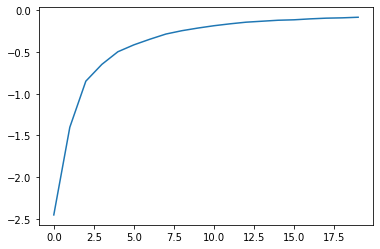

1


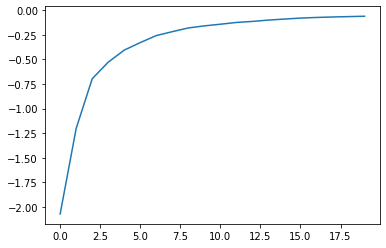

2


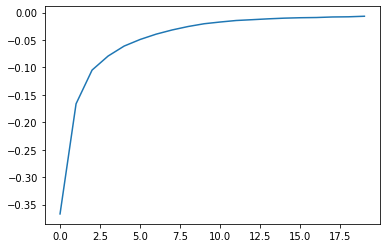

3


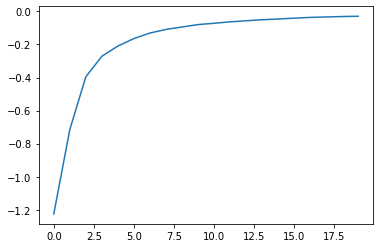

4


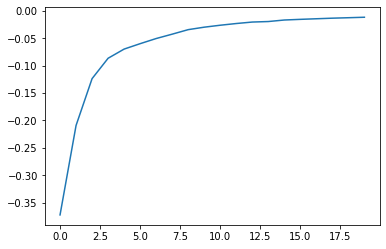

5


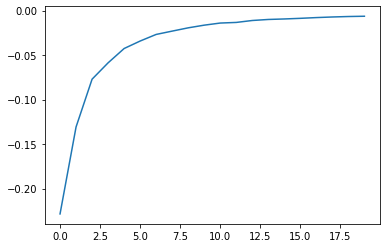

6


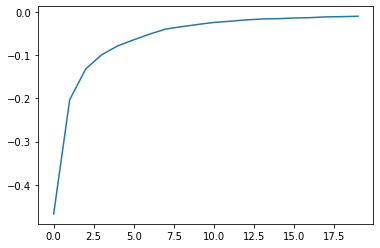

7


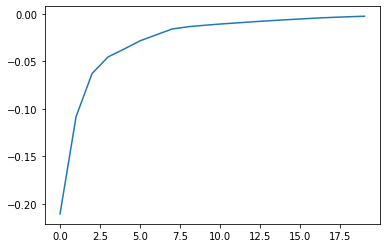

8


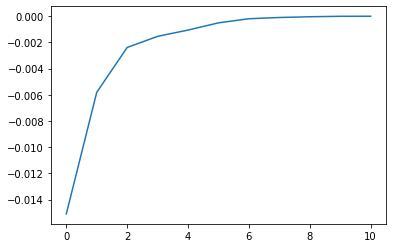

9


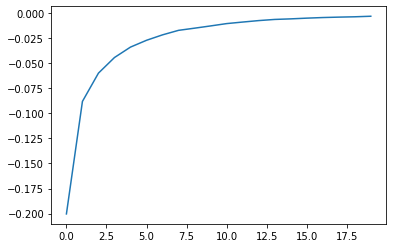

10


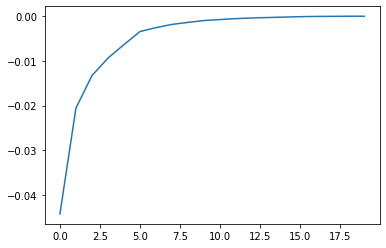

11


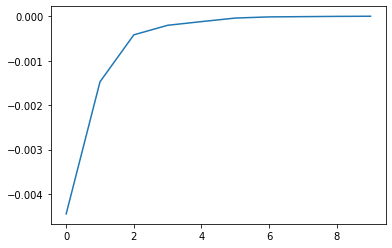

12


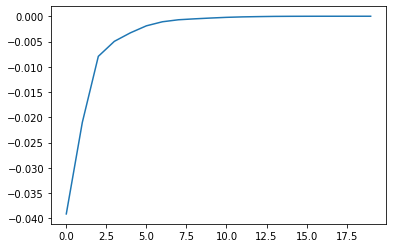

13


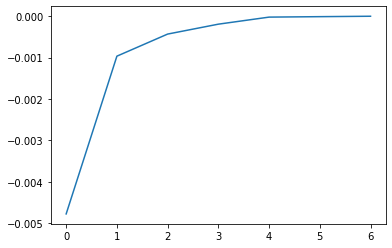

In [76]:
elbow(clustering(vanc))

In [78]:
vanc = clustering2(clustering(vanc), [3, 3, 5, 5, 3, 5, 3, 3, 2, 4 ,6, 2, 5, 1])
vanc.to_csv("clustered_vanc.csv")

0


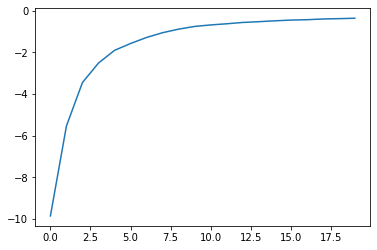

1


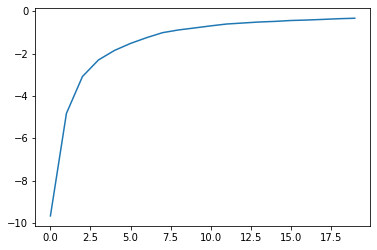

2


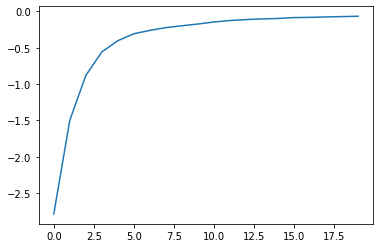

3


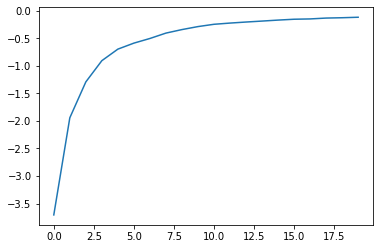

4


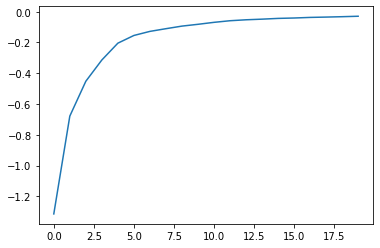

5


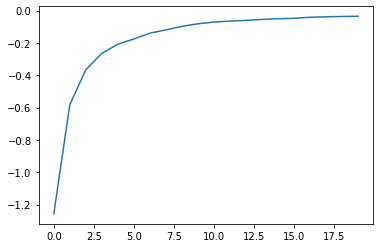

6


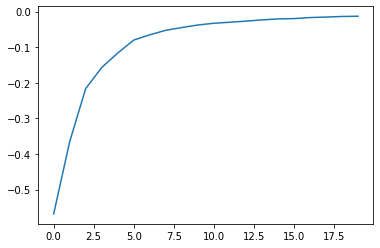

7


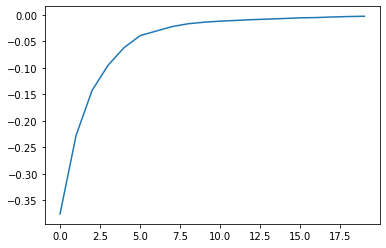

8


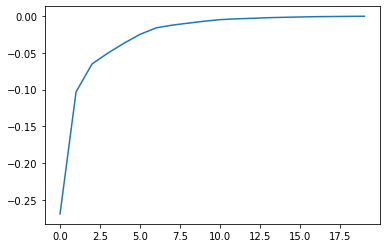

9


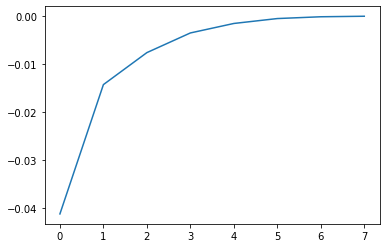

10


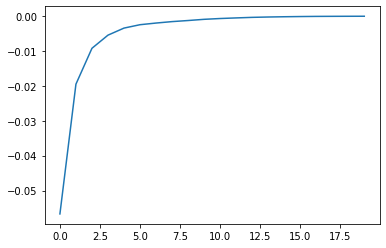

11


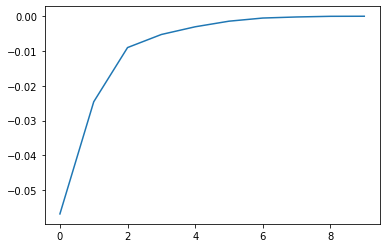

12


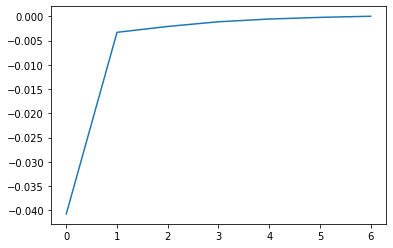

13


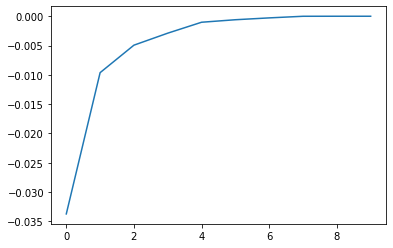

In [80]:
elbow(clustering(atlanta))

In [81]:
atlanta = clustering2(clustering(atlanta), [6, 5, 3, 5, 4, 3, 5, 5, 6, 3, 4, 2, 1, 1])
atlanta.to_csv("clustered_atlanta.csv")

0


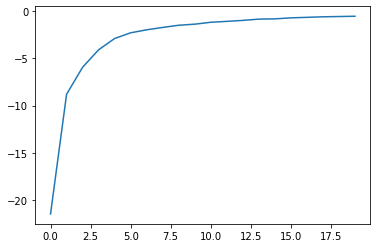

1


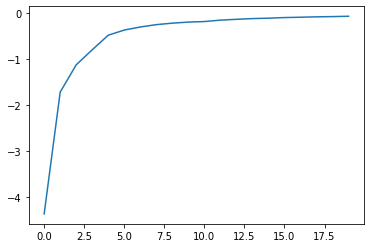

2


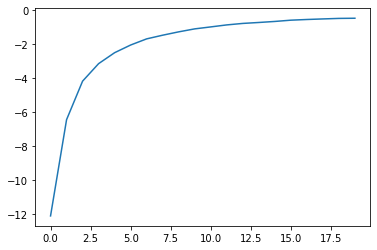

3


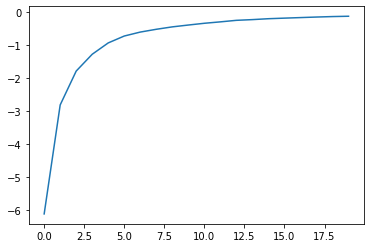

4


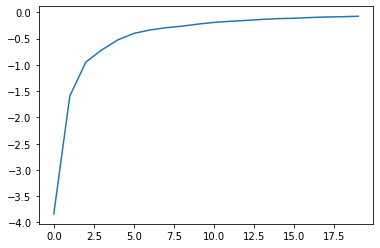

5


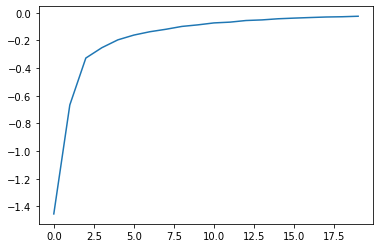

6


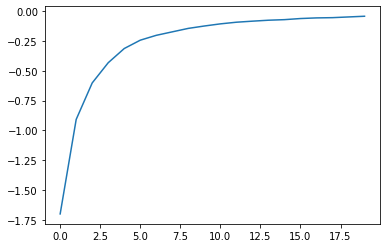

7


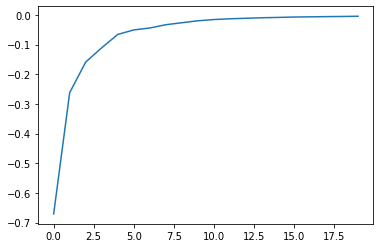

8


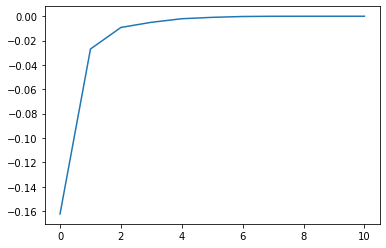

9


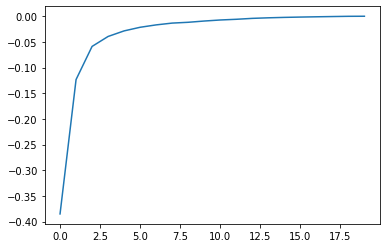

10


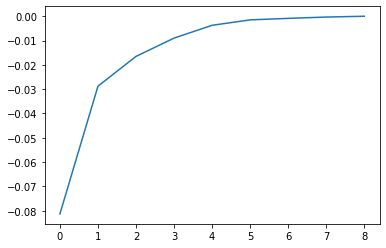

11


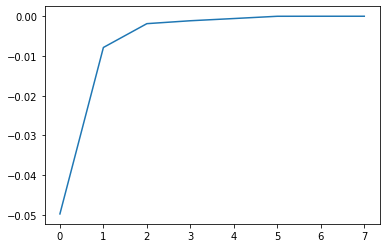

In [82]:
elbow(clustering(orlando))

In [83]:
orlando = clustering2(clustering(orlando), [4, 4, 5, 5, 5, 2, 4, 4, 2, 2, 1, 1])
orlando.to_csv("clustered_orlando.csv")

0


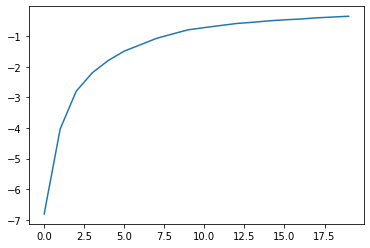

1


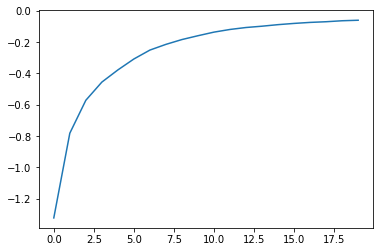

2


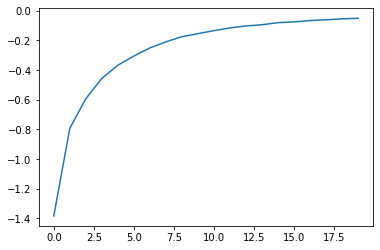

3


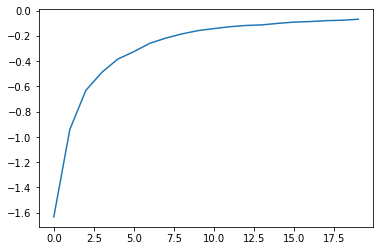

4


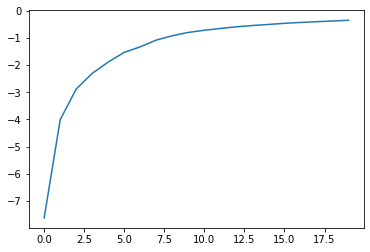

5


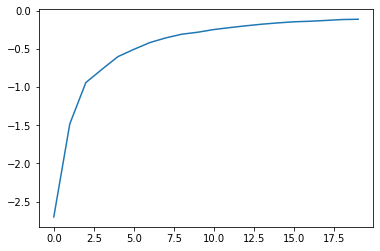

6


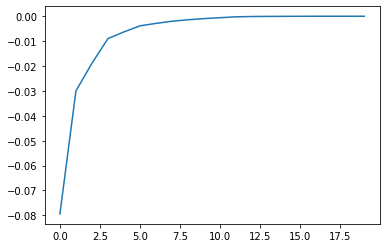

7


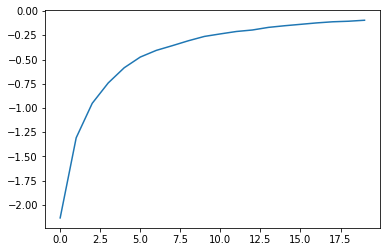

8


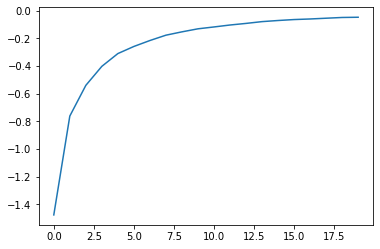

9


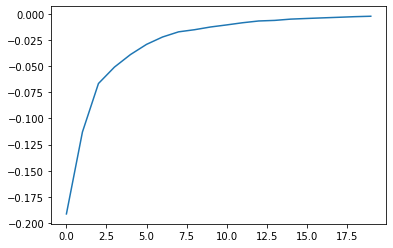

10


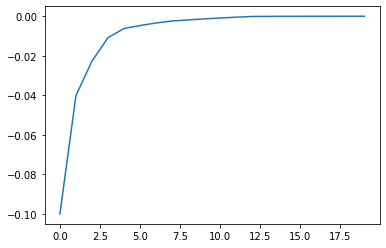

11


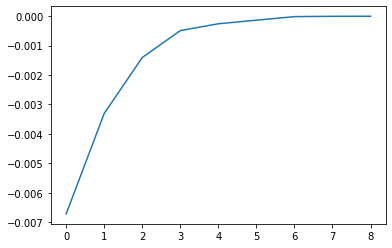

12


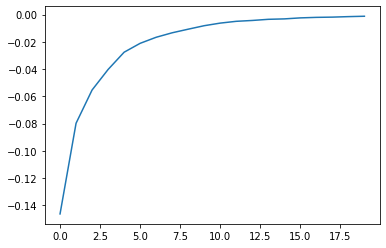

13


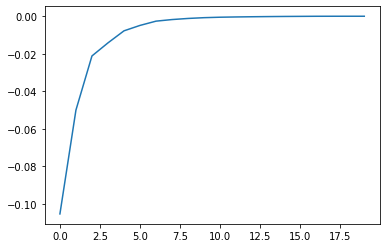

14


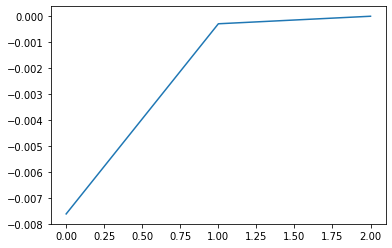

15


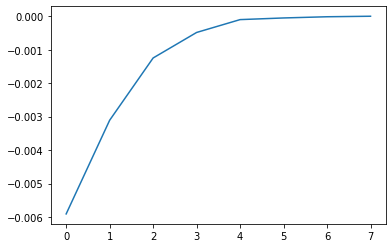

In [86]:
elbow(clustering(port))

In [91]:
port = clustering2(clustering(port), [5, 5, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 4, 2, 1, 3])
port.to_csv("clustered_port.csv")